[![alt-text](img/LP-School-Of-AI-black.png)](https://www.facebook.com/groups/1204328906374103/)

# Introducción a Statistical Machine Learning
## Semana III: Regresión Lineal y Regularización 
por: [Marco Antonio Vino](https://www.linkedin.com/in/mavino)
### 3.1 Regresión lineal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
x= np.arange(0,40)
x1 = np.linspace(0,40)
np.random.seed(100)
y = 3.4 + 6.7*x + np.random.randn(x.shape[0])*50

## Regresión Lineal de 1 variable

(0, 400)

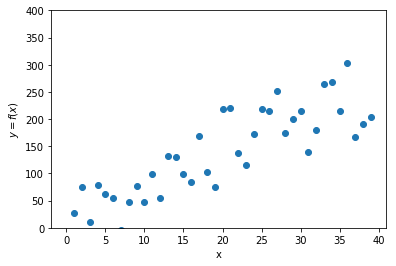

In [3]:
plt.scatter(x,y)
plt.ylabel("$y=f(x)$")
plt.xlabel("x")
plt.ylim(0,400)


Lo que buscamos es encontrar una función que pueda "replicar" nuestros datos de manera coherente, parece razonable plantear una relación lineal para nuestro ejemplo

$$ y_i = \theta_0 + \theta_1 x_i + \epsilon_i$$


PARTE DETERMINISTICA:  $$  \theta_0 + \theta_1 x_i $$

PARTE ESTOCASTICA:
     $$\epsilon_i$$

(El subindice $i$ denota los valores de la i-ésima observación)


In [4]:
def f_update(t0,t1):
    plt.scatter(x,y)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.plot(x, t0 + t1*x, c="purple")
    plt.ylim(0,400)

### Introduzcamos la línea en nuestra gráfica

In [5]:
interactive(f_update, t0=(-100,200), t1=(-30,30))

interactive(children=(IntSlider(value=50, description='t0', max=200, min=-100), IntSlider(value=0, description…

¿Cómo se cuál es la linea "correcta"?

### Necesitamos una medida para saber si estamos cerca de nuestro objetivo:

$$ y_i - (\theta_0 + \theta_1 x_i) = \epsilon_i$$

* $\theta_0$ y $\theta_1$ son parámetros poblacionales, y no los llegaremos a conocer
* Nos aproximaremos a ellos a través de un *ESTIMACIÓN DE PARÁMETROS*
* ADVERTENCIA por temas de notación utilizaremos $\theta_0$, $\theta_1$ en lugar de  $\hat{\theta_0}$, $\hat{\theta_1}$.  

$$h(x_i|\Theta) = \hat{y_i} = \theta_0 + \theta_1 x_i $$

Por simplificar la notación utilizaremos solamente:
    $$ h(x_i)$$ en lugar de: $$h(x_i|\Theta)$$

In [6]:
i = 12
def errores(i):
    plt.scatter(x,y)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.plot(x, 25 + 6*x, c="purple")
    plt.plot(x[20], c="yellow")
    plt.ylim(0,400)
    plt.scatter(x[i], y[i],c="red") #Valor original
    plt.scatter(x[i], 25 + 6*x[i],c="green") # Valor estimado
    print("y_i","\t","y*_i","\t","e")
    print( round(y[i],2),"\t", (25 + 6*x[i]) ,"\t", round(y[i] - (25 + 6*x[i]),2))
interactive(errores, i=(0,40))

interactive(children=(IntSlider(value=20, description='i', max=40), Output()), _dom_classes=('widget-interact'…

¿Sumamos todos los errores?

$$ \sum_{i=1}^N{\epsilon_i} = \sum_{i=1}^N{y_i - h(x_i)} $$


* Al existir errores positivos y negativos usar una sumatoria simple tenderá a "eliminar" los errores. 
* Utilizamos la sumatoria de los cuadrados de los errores

 $$ \sum_{i=1}^N{\epsilon_i^2} = \sum_{i=1}^N{[y_i - h(x_i)]^2} $$

 ### Función de costo 

 $$ J(\Theta) =  \sum_{i=1}^N{[y_i - h(x_i)]^2} $$

In [7]:
def f_update_e(t0,t1):
    plt.scatter(x,y)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.plot(x, t0 + t1*x, c="purple")
    plt.ylim(0,400)
    print(round(np.sum(np.square(y - (t0 + t1*x))),2 ))

In [8]:
interactive(f_update_e, t0=(-100,200), t1=(-30,30))

interactive(children=(IntSlider(value=50, description='t0', max=200, min=-100), IntSlider(value=0, description…

$J$ esta en función de los parámetros o pesos de nuestro modelo, para que su valor cambie lo que tenemos que hacer es cambiar los valores de $\Theta$

 ### Nuestro objetivo es: MINIMIZAR LA FUNCIÓN DE COSTO

$$\min_{\Theta} \ \  J(\Theta) =  \sum_{i=1}^N{[y_i - h(x_i)]^2} $$

Tendremos 2 formas de solucionar este problema.  
* De manera Iterativa
* De manera Analítica

#### Solución analítica

Derivamos nuestra función de costo respecto a los parámetros de nuestro vector $\Theta$

$$\min_{\Theta} \ \  J(\Theta) =  \sum_{i=1}^N{[y_i - h(x_i)]^2} $$

Reexpresamos en términos de $\theta_i$

$$\min_{\Theta} \ \  J(\Theta) =  \sum_{i=1}^N{[y_i - \theta_0 - \theta_1x_i]^2} $$

Derivamos y obtenemos el gradiente: 

$$\frac{\partial J}{\partial \theta_0} = 2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-1)$$

$$\frac{\partial J}{\partial \theta_1} = 2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-x_i)$$

Igualamos a 0 

$$\nabla J = \;
\begin{bmatrix}
 \frac{\partial J}{\partial \theta_0} \\
 \frac{\partial J}{\partial \theta_1} 
\end{bmatrix}
=
 \begin{bmatrix}
      2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-1) \\
      2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-x_i)\\
    \end{bmatrix}
     = 
     \begin{bmatrix}
     0 \\ 
     0
     \end{bmatrix}
     $$

$$  \begin{bmatrix}
      \sum{(y_i−\theta_0 − \theta_1 x_i)} \\
      \sum{(y_i−\theta_0 − \theta_1 x_i)}(x_i)\\
    \end{bmatrix}
     = 
     \begin{bmatrix}
     0 \\ 
     0
     \end{bmatrix}
     $$

Sistema de ecuaciones normales. 

$$  \begin{bmatrix}
      \sum y_i - n\theta_0 - \theta_i \sum x_i \\
      \sum x_iy_i - \theta_0 \sum x_i - \theta_1 \sum x_i^2\\
    \end{bmatrix}
     = 
     \begin{bmatrix}
     0 \\ 
     0
     \end{bmatrix}
     $$

Resolviendo el sistema de ecuaciones obtenemos:

$$\theta_0^* = \bar{y} - \theta_1 \bar{x}$$

$$\theta_1^* = \frac{\sum x_i y_i - \bar{y}\sum x_i}{\sum x_i^2 - \bar{x} \sum{x_i}}$$

Esto se puede generalizar a un modelo lineal con más variables:

Sea: 

$$ y_i = \theta_0 + \theta_1x_{1i} + \theta_2x_{2i} + ... + \theta_kx_{ki} + \epsilon_i $$

Podemos generalizar y representar la notación vectorial de todas las $n$ observaciones

$$ Y = X\Theta + U $$

Donde:

$Y$: Es el vector de $y_i$  $(n,1)$  

$X$: Es una matriz  que contiene los valores de las variables para las n observaciones de dimensiones $(n,k+1)$  

$\Theta$: Es un vector columna que contiene los valores de los parámetros de la función de dimensiones $(k+1,1)$  

$U$: Es un vector columna  de los errores para cada observación de los dimensiones $(n,1)$  

De manera similar, se puede minimizar la función de costo de la función con k variables, llegando al siguiente resultado: 

$$ \Theta^* = (X'X)^{-1}X'Y$$

### Solución iterativa

Nuestro objetivo sigue siendo el mismo 

$$\min_{\Theta} \ \  J(\Theta) =  \sum_{i=1}^N{[y_i - h(x_i)]^2} $$

In [9]:
interactive(f_update_e, t0=(-100,200), t1=(-30,30))

interactive(children=(IntSlider(value=50, description='t0', max=200, min=-100), IntSlider(value=0, description…

Realizaremos unos pequeños cambios para que la interpretación de las actualizaciones de los pesos sean más intuitivas

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}\sum_{i=1}^N{[h(x_i)  -y_i]^2 } $$

### GRADIENT DESCENT

Es un algoritmo de optimización iterativo de primer orden, es decir,considera la cercania de la función a un punto óptimo, en función del valor de su primera derivada.  

* Inicializamos los Parámetros de manera aleatoria
* Por el número de iteraciones definidas. 
    * Calculamos el valor del los gradientes
    * Actualizamos los parámetros


![alt-text](img/optimizacion.png)

![alt-text](img/opt.gif)

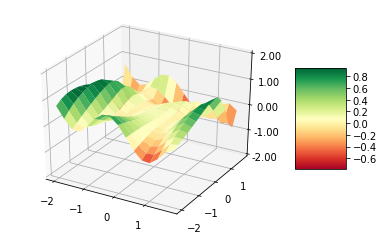

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Generando datos
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin((1/2)*X**2 - (1/4)*Y**2 + 3)*np.cos(2*X + 1 - np.exp(Y))

fig = plt.figure()
ax = fig.gca(projection='3d')
# La superficie
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.get_cmap('RdYlGn'),
                       linewidth=0, antialiased=True, )
ax.set_zlim(-2, 2)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Añadiendo los colores
fig.colorbar(surf, shrink=0.7, aspect=2)
plt.show()


Obtenemos el gradiente:

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}\sum{(h(x_i) - y_i)}$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}\sum{(h(x_i) - y_i)}(x_i)$$

### Regla de ACTUALIZACIÓN DE LOS PARÁMETROS
Formulación intuitiva

$$ \theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$

Definición formal:

$$ \theta_i^{(t)} := \theta_i^{(t-1)} - \alpha \frac{\partial J}{\partial \theta_i}\Big|_{\theta_i^{(t-1)}}$$

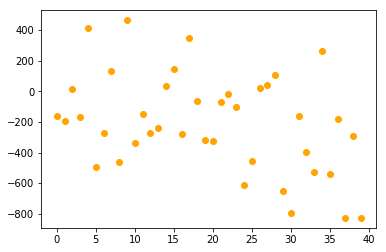

In [11]:
y1 = 3.4 + 6.7*x  - 0.5*x**2 + np.random.randn(x.shape[0])*300
x1 = np.linspace(0,30)
plt.scatter(x,y1, c="orange")

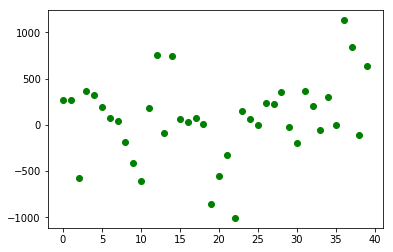

In [12]:
x2= np.arange(-40,40)
y2 = 3.4 + 6.7*x  - 0.5*x**2  + 0.02*x**3 + np.random.randn(x.shape[0])*380
plt.scatter(x,y2,c="green")

In [13]:
def f_update(t0,t1):
    plt.scatter(x,y2, c="green")
    plt.plot(x, t0 + t1*x, c="purple")
    plt.plot(x, 3.4 + 6.7*x  - 0.5*x**2  + 0.02*x**3, c="black")
    

In [14]:
interactive(f_update, t0=(-500,100), t1=(-100,100))

interactive(children=(IntSlider(value=-200, description='t0', min=-500), IntSlider(value=0, description='t1', …

Dentro de mi expresión pued incluir terminos polínomicos de las variables.  


$$ y_i = \theta_0 + \theta_1x_{1i} + \theta_2x_{2i} + ... + \theta_kx_{ki} + \epsilon_i $$

Donde: 

$$ x_{2i} = x_{1i}^2$$
$$ x_{3i} = x_{1i}^3$$

tambien puedo incluir interacciones de las varibles.  

$$ x_{4i} = x_{1i}x_{2i}$$

## Esto nos puede generar el problema de OVERFITTING

![alt-text](img/overfitting.png)

Los métodos a través de los cuales podemos intentar solucionarlos son llamdados MÉTODOS DE REGULARIZACIÓN

#### Regularazación L1
Valor Absoluto

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}[\sum_{i=1}^N{[h(x_i)  -y_i]^2 + \lambda\sum_{j=1}
^k |\theta_j| } ]$$

#### Regularazación L2
Cuadrados

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}[\sum_{i=1}^N{[h(x_i)  -y_i]^2 + \lambda\sum_{j=1}
^k \theta_j^2 } ]$$

[![alt-text](img/cdd-lp-gray.png)](https://www.facebook.com/ccd.bolivia.bo/)